In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score


In [22]:
#load the dataset
df_org = pd.read_csv("train.csv",encoding="latin1")
df = df_org[["selected_text","sentiment"]]

In [23]:
df.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [24]:
df["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [25]:
#encode the data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["sentiment"] = encoder.fit_transform(df["sentiment"])

C:\Users\Aspire_Lays\AppData\Local\Temp\ipykernel_10988\732510186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = encoder.fit_transform(df["sentiment"])


In [26]:
#check for nulls
df.isna().any()

selected_text     True
sentiment        False
dtype: bool

In [27]:
#handle the null
df.dropna(inplace=True)
df.head()

C:\Users\Aspire_Lays\AppData\Local\Temp\ipykernel_10988\784308780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,selected_text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


In [28]:
#check shape
df.shape

(27480, 2)

In [29]:
df["sentiment"].unique()

array([1, 0, 2])

C:\Users\Aspire_Lays\AppData\Local\Temp\ipykernel_10988\2354103880.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


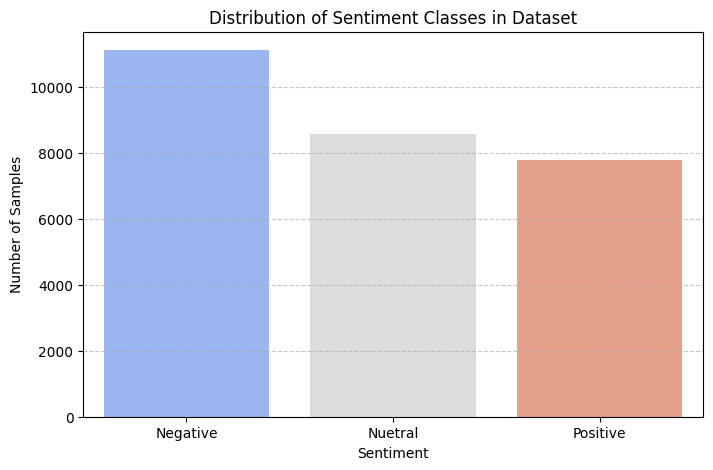

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Define class labels
sentiment_labels = {0: "Positive", 1: "Negative", 2: "Nuetral"}

# Map integer labels to string labels for better visualization
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")

# Add labels
plt.title("Distribution of Sentiment Classes in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)  # Keep x-labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [31]:
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['selected_text'])
X = tokenizer.texts_to_sequences(df['selected_text'])

# Padding sequences to make them of equal length
X = pad_sequences(X, padding='post')

# Label encoded sentiments
y = df['sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, Dropout

# Define the RNN model
rnn_model = Sequential()

# Embedding layer
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X.shape[1]))
# Batch Normalization after embedding
rnn_model.add(BatchNormalization())
# RNN layer
rnn_model.add(SimpleRNN(units=64, activation='tanh'))
# Batch Normalization before Dense layer
rnn_model.add(BatchNormalization())
# Dense output layer
rnn_model.add(Dense(3, activation='softmax'))
# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


c:\Users\Aspire_Lays\anaconda3\envs\torch\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6405 - loss: 0.8123 - val_accuracy: 0.7711 - val_loss: 0.6954
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7904 - loss: 0.5994 - val_accuracy: 0.7669 - val_loss: 0.6376
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8248 - loss: 0.5209 - val_accuracy: 0.7702 - val_loss: 0.6372
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7778 - loss: 0.5958 - val_accuracy: 0.7429 - val_loss: 0.7433
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8048 - loss: 0.5840 - val_accuracy: 0.7100 - val_loss: 0.7808


In [ ]:
from keras.layers import LSTM

# Define the LSTM model
lstm_model = Sequential()
# Embedding layer
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X.shape[1]))
# Batch Normalization after embedding
lstm_model.add(BatchNormalization())
# LSTM layer
lstm_model.add(LSTM(units=64, activation='tanh', return_sequences=False))
# Batch Normalization before Dense layer
lstm_model.add(BatchNormalization())
# Dense output layer
lstm_model.add(Dense(3, activation='softmax'))
# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5912 - loss: 0.8510 - val_accuracy: 0.7893 - val_loss: 0.5751
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8300 - loss: 0.4781 - val_accuracy: 0.8088 - val_loss: 0.4992
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8894 - loss: 0.3288 - val_accuracy: 0.8222 - val_loss: 0.5155
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9185 - loss: 0.2523 - val_accuracy: 0.8071 - val_loss: 0.5746
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9351 - loss: 0.2061 - val_accuracy: 0.8090 - val_loss: 0.6039


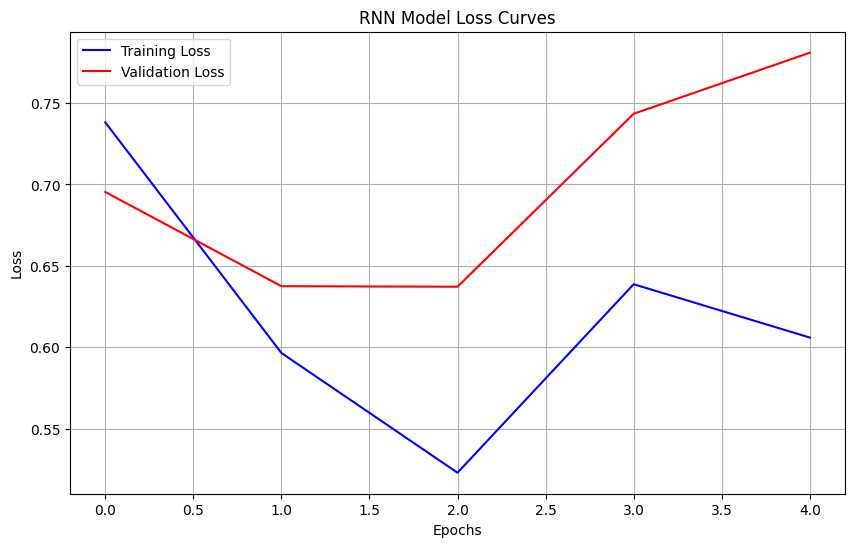

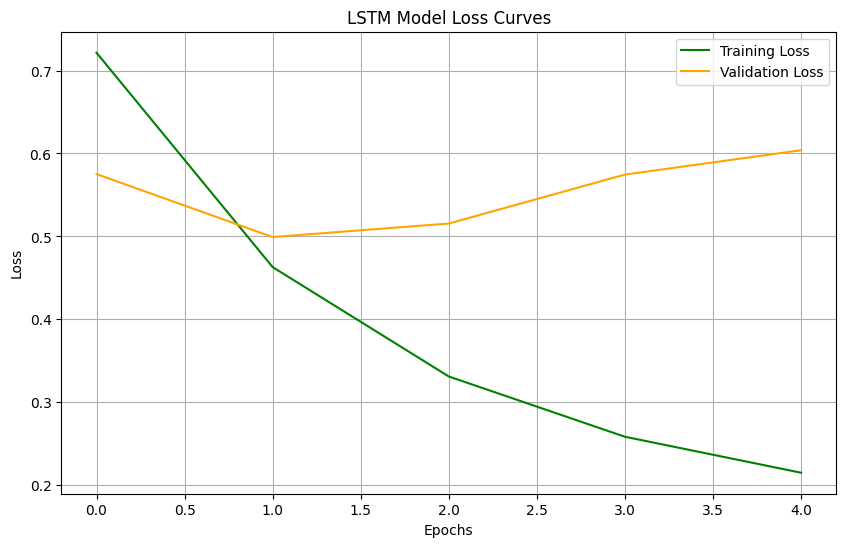

In [33]:
import matplotlib.pyplot as plt

# Extract loss values from the RNN training history
rnn_train_loss = rnn_history.history['loss']
rnn_val_loss = rnn_history.history['val_loss']

# Plot the loss curves for RNN
plt.figure(figsize=(10, 6))
plt.plot(rnn_train_loss, label='Training Loss', color='blue')
plt.plot(rnn_val_loss, label='Validation Loss', color='red')
plt.title('RNN Model Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Extract loss values from the LSTM training history
lstm_train_loss = lstm_history.history['loss']
lstm_val_loss = lstm_history.history['val_loss']

# Plot the loss curves for LSTM
plt.figure(figsize=(10, 6))
plt.plot(lstm_train_loss, label='Training Loss', color='green')
plt.plot(lstm_val_loss, label='Validation Loss', color='orange')
plt.title('LSTM Model Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

===== RNN Evaluation =====
Accuracy: 0.7100

Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.67      0.68      1572
     Neutral       0.69      0.77      0.73      2236
    Positive       0.76      0.67      0.71      1688

    accuracy                           0.71      5496
   macro avg       0.71      0.70      0.71      5496
weighted avg       0.71      0.71      0.71      5496



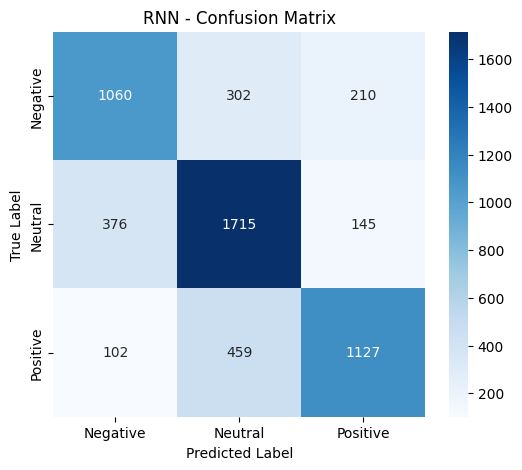

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

===== LSTM Evaluation =====
Accuracy: 0.8090

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.84      0.78      1572
     Neutral       0.80      0.80      0.80      2236
    Positive       0.92      0.80      0.85      1688

    accuracy                           0.81      5496
   macro avg       0.82      0.81      0.81      5496
weighted avg       0.82      0.81      0.81      5496



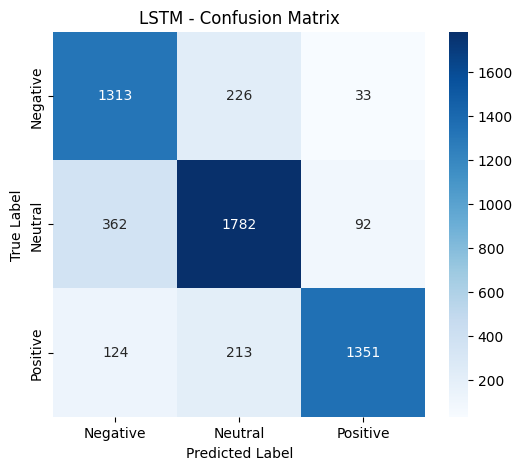

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates the given model and prints performance metrics.
    """
    # Get predictions (as probability distributions)
    y_pred_prob = model.predict(X_test)
    
    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n===== {model_name} Evaluation =====")
    print(f"Accuracy: {accuracy:.4f}\n")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Evaluate RNN Model
evaluate_model(rnn_model, X_test, y_test, model_name="RNN")

# Evaluate LSTM Model
evaluate_model(lstm_model, X_test, y_test, model_name="LSTM")


In [36]:
# Function to predict sentiment for a given text
def predict_sentiment(model, text, tokenizer, model_name="Model"):
    """
    Preprocesses the input text, predicts sentiment using the given model, and returns the sentiment.
    """
    # Tokenize the text
    seq = tokenizer.texts_to_sequences([text])

    # Pad the sequence to match the model's input shape
    padded_seq = pad_sequences(seq, maxlen=X.shape[1])

    # Predict sentiment probabilities
    pred_prob = model.predict(padded_seq)

    # Convert softmax output to class label
    pred_label = np.argmax(pred_prob, axis=1)[0]

    # Sentiment mapping
    sentiment_map = {0: "Positive", 1: "Nuetral", 2: "Negative"}

    print(f"\n===== {model_name} Prediction =====")
    print(f"Input Text: {text}")
    print(f"Predicted Sentiment: {sentiment_map[pred_label]}\n")

    return sentiment_map[pred_label]

# Example text input
sample_text = "I absolutely love this product! It's amazing."

# Predict sentiment using RNN
predict_sentiment(rnn_model, sample_text, tokenizer, model_name="RNN")

# Predict sentiment using LSTM
predict_sentiment(lstm_model, sample_text, tokenizer, model_name="LSTM")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

===== RNN Prediction =====
Input Text: I absolutely love this product! It's amazing.
Predicted Sentiment: Nuetral

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

===== LSTM Prediction =====
Input Text: I absolutely love this product! It's amazing.
Predicted Sentiment: Positive



'Positive'